To analyze and manipulate images by converting them into CMY, CMV, and HSV color models and examining their individual channels. The experiment also explores the effects of pixel manipulation, such as brightness adjustment, on different color representations.

In [ ]:
#Experiment 5
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def convert_to_cmy(image):
    cmy = 1 - image / 255.0
    return (cmy * 255).astype(np.uint8)

def convert_to_cmv(image):
    r, g, b = cv2.split(image)
    v = np.maximum(np.maximum(r, g), b)
    c = v - r
    m = v - g
    y = v - b
    return cv2.merge([c, m, y])

In [3]:
# Read the image
image = cv2.imread("image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

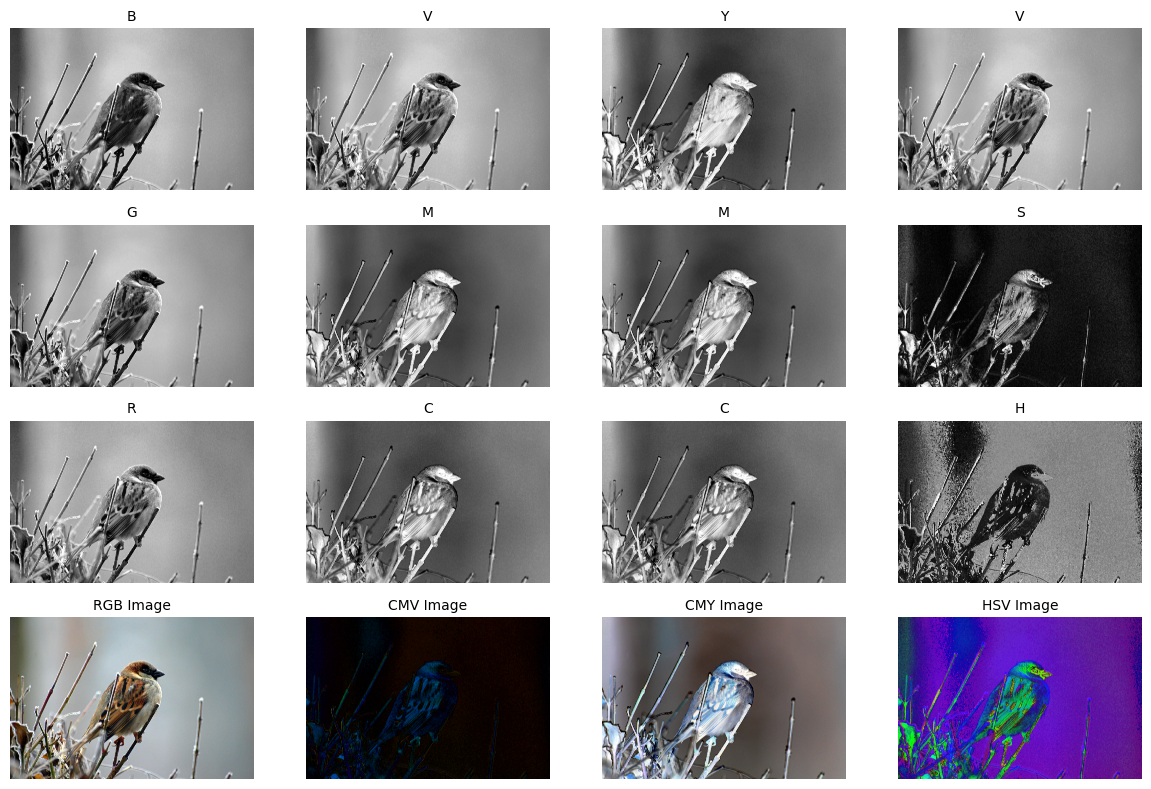

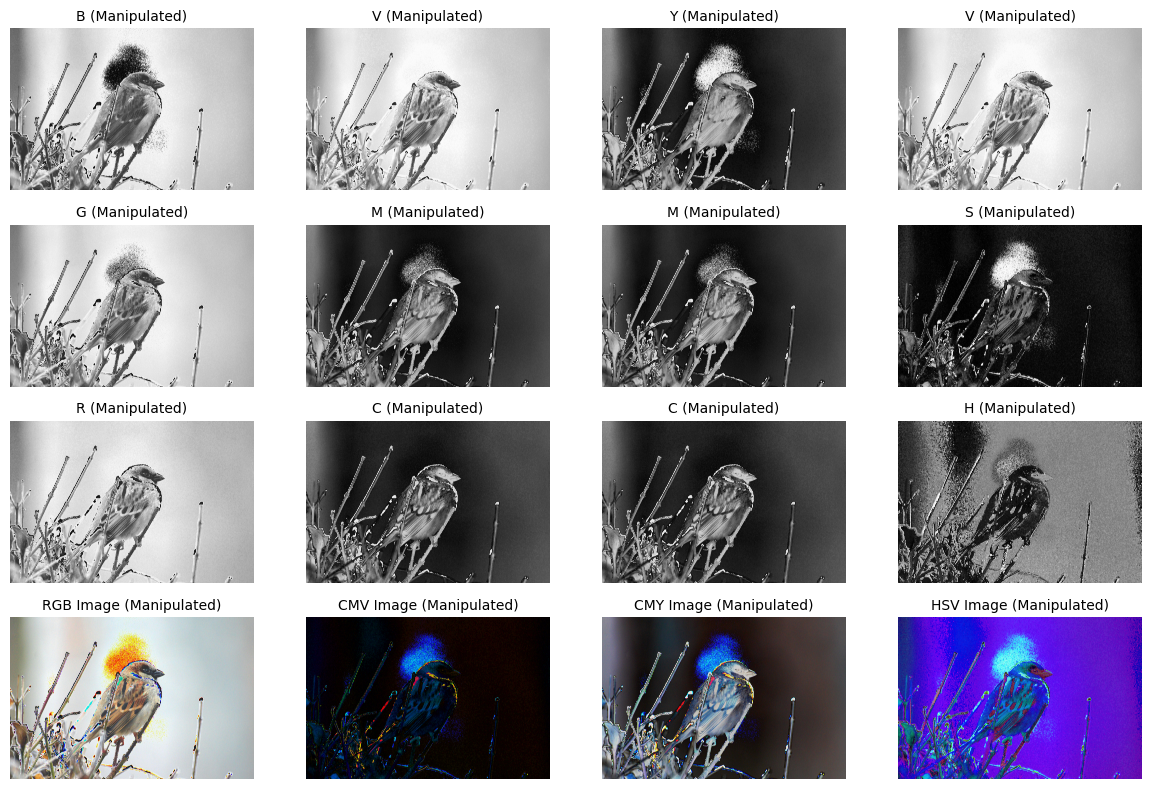

In [ ]:
# Pixel manipulation (example: increasing brightness)
manipulated_image = np.clip(image + 50, 0, 255).astype(np.uint8)

# Convert to CMY
cmy_image = convert_to_cmy(image)
cmy_manipulated = convert_to_cmy(manipulated_image)
C, M, Y = cv2.split(cmy_image)
C_m, M_m, Y_m = cv2.split(cmy_manipulated)

# Convert to CMV
cmv_image = convert_to_cmv(image)
cmv_manipulated = convert_to_cmv(manipulated_image)
C_cmv, M_cmv, Y_cmv = cv2.split(cmv_image)
C_cmv_m, M_cmv_m, Y_cmv_m = cv2.split(cmv_manipulated)

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hsv_manipulated = cv2.cvtColor(manipulated_image, cv2.COLOR_RGB2HSV)
H, S, V = cv2.split(hsv_image)
H_m, S_m, V_m = cv2.split(hsv_manipulated)

# Create first figure for original image
fig1, axes1 = plt.subplots(4, 4, figsize=(12, 8))
axes1 = axes1.flatten()

titles1 = ['B', 'V', 'Y', 'V', 'G', 'M', 'M', 'S', 'R', 'C', 'C', 'H', 'RGB Image', 'CMV Image', 'CMY Image', 'HSV Image']
images1 = [image[:, :, 2], V, Y, V, image[:, :, 1], M, M, S, image[:, :, 0], C, C, H, image, cmv_image, cmy_image, hsv_image]

for ax, img, title in zip(axes1, images1, titles1):
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(title, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Create second figure for manipulated image
fig2, axes2 = plt.subplots(4, 4, figsize=(12, 8))
axes2 = axes2.flatten()

titles2 = ['B (Manipulated)', 'V (Manipulated)', 'Y (Manipulated)', 'V (Manipulated)', 'G (Manipulated)', 'M (Manipulated)', 'M (Manipulated)', 'S (Manipulated)', 'R (Manipulated)', 'C (Manipulated)', 'C (Manipulated)', 'H (Manipulated)', 'RGB Image (Manipulated)', 'CMV Image (Manipulated)', 'CMY Image (Manipulated)', 'HSV Image (Manipulated)']
images2 = [manipulated_image[:, :, 2], V_m, Y_m, V_m, manipulated_image[:, :, 1], M_m, M_m, S_m, manipulated_image[:, :, 0], C_m, C_m, H_m, manipulated_image, cmv_manipulated, cmy_manipulated, hsv_manipulated]

for ax, img, title in zip(axes2, images2, titles2):
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(title, fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()